# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import numpy as np
import geoviews as gv
from geoviews import opts

# Import API key
from api_keys import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data3/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Latitude,Longitude,Max_Temperature,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
0,0,dwarka,22.2394,68.9678,84.42,85.0,1004.0,1.0,16.26,IN,1.717255e+09
1,1,blackmans bay,-43.0167,147.3167,44.73,86.0,1026.0,5.0,5.01,AU,1.717255e+09
2,2,bethel,41.3712,-73.4140,76.98,47.0,1020.0,0.0,5.75,US,1.717254e+09
3,3,opole,50.5000,18.0000,71.08,54.0,1009.0,32.0,10.56,PL,1.717255e+09
4,4,longyearbyen,78.2186,15.6401,37.24,87.0,1015.0,100.0,2.30,SJ,1.717255e+09


In [3]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City_ID          569 non-null    int64  
 1   City             569 non-null    object 
 2   Latitude         540 non-null    float64
 3   Longitude        540 non-null    float64
 4   Max_Temperature  540 non-null    float64
 5   Humidity         540 non-null    float64
 6   Pressure         540 non-null    float64
 7   Cloudiness       540 non-null    float64
 8   Wind Speed       540 non-null    float64
 9   Country          537 non-null    object 
 10  Date             540 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 49.0+ KB


In [4]:
city_data_df.count()

City_ID            569
City               569
Latitude           540
Longitude          540
Max_Temperature    540
Humidity           540
Pressure           540
Cloudiness         540
Wind Speed         540
Country            537
Date               540
dtype: int64

# Step 1: Create a map that displays a point for every city in the city_data_df DataFrame. The size of the point should be the humidity in each city.

In [15]:
# Drop null values from the DataFrame
city_data_df = city_data_df.dropna()

# Configure the map plot
map_plot = city_data_df.hvplot.points(
    x='Longitude',  
    y='Latitude',  
    geo=True,
    size='Humidity',  
    color='Humidity', 
    cmap='coolwarm',  
    title='City Humidity Map',
    frame_width=600,
    frame_height=400,  
    hover_cols=['City', 'Humidity'],  
    tiles='EsriNatGeo'
)

# Display the map plot
map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Humidity,City)

# Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [6]:
# Narrow down cities that fit criteria including temperature range, wind speed, and cloudiness in Fahrenheit
min_temp_celsius = 21
max_temp_celsius = 27
max_wind_speed = 4.5
max_cloudiness = 0

# Convert Celsius to Fahrenheit
min_temp_fahrenheit = (min_temp_celsius * 9/5) + 32
max_temp_fahrenheit = (max_temp_celsius * 9/5) + 32

filtered_cities = city_data_df.loc[
    (city_data_df['Max_Temperature'].notnull()) &  # Ensure Max_Temperature is not null
    (city_data_df['Max_Temperature'] >= min_temp_fahrenheit) & 
    (city_data_df['Max_Temperature'] <= max_temp_fahrenheit) &
    (city_data_df['Wind Speed'] < max_wind_speed) &
    (city_data_df['Cloudiness'] == max_cloudiness)
]

# Display sample data
filtered_cities.head()


,City_ID,City,Latitude,Longitude,Max_Temperature,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
267,267,palpala,-24.2565,-65.2116,72.86,28.0,1013.0,0.0,3.51,AR,1.717255e+09
277,277,mahina,-17.5065,-149.4890,73.17,83.0,1012.0,0.0,3.44,PF,1.717255e+09
307,307,buka,40.8108,69.1986,78.96,18.0,1012.0,0.0,3.69,UZ,1.717255e+09
322,322,ixtapa,20.7000,-105.2000,79.83,74.0,1011.0,0.0,0.00,MX,1.717255e+09
473,473,forest,37.3638,-79.2897,75.29,47.0,1024.0,0.0,3.44,US,1.717255e+09


In [7]:
filtered_cities.count()

City_ID            6
City               6
Latitude           6
Longitude          6
Max_Temperature    6
Humidity           6
Pressure           6
Cloudiness         6
Wind Speed         6
Country            6
Date               6
dtype: int64

### Step 3: Create a new DataFrame called `hotel_df`.

In [8]:
# Use the Pandas copy function to create a DataFrame called hotel_df to store city, country, coordinates, and humidity
hotel_df = filtered_cities[['City', 'Country', 'Latitude', 'Longitude', 'Humidity']].copy()

# Add an empty column "Hotel Name", to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df['Hotel Name'] = ""

# Display sample data
hotel_df.head()

,City,Country,Latitude,Longitude,Humidity,Hotel Name
267,palpala,AR,-24.2565,-65.2116,28.0,
277,mahina,PF,-17.5065,-149.4890,83.0,
307,buka,UZ,40.8108,69.1986,18.0,
322,ixtapa,MX,20.7000,-105.2000,74.0,
473,forest,US,37.3638,-79.2897,47.0,


In [9]:
hotel_df.count()

City          6
Country       6
Latitude      6
Longitude     6
Humidity      6
Hotel Name    6
dtype: int64

In [10]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 267 to 544
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        6 non-null      object 
 1   Country     6 non-null      object 
 2   Latitude    6 non-null      float64
 3   Longitude   6 non-null      float64
 4   Humidity    6 non-null      float64
 5   Hotel Name  6 non-null      object 
dtypes: float64(3), object(3)
memory usage: 336.0+ bytes


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [11]:
# STEP 1: Build URL using the places endpoint
base_url = "https://api.geoapify.com/v2/places"

# Set the parameters for the type of place
categories = "accommodation"
radius = 10000  # meters

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    
    # Get latitude, longitude from the DataFrame
    latitude = row['Latitude']
    longitude = row['Longitude']

    # Set the parameters for the type of search
    filters = f"circle:{longitude},{latitude},{radius}"
    bias = f"proximity:{longitude},{latitude}"
    limit = 1

    # Set up a parameters dictionary
    params = {
        "categories": categories,
        "limit": limit,
        "filter": filters,
        "bias": bias,
        "api_keys": geoapify_key
    }

    # Step 2: Perform API request
    response = requests.get(base_url, params=params)

    # Step 3: Check the status code
    status_code = response.status_code

    # Step 4: Process the response
    if status_code == 200:
        data = response.json()
    else:
        data = {}  # failed request

    # Step 5: Extract relevant information
    results = data.get("features", [])
    result = results[0] if results else {}
    properties = result.get("properties", {})
    accommodation = properties.get("accommodation", {}).get("hotel", "")
    country = properties.get("country", "")
    city = properties.get("city", "")
    longitude = result.get("longitude")
    latitude = result.get("latitude")
    address = properties.get("formatted", "")
    distance = result.get("distance", "")

def extract_hotel_data(index, name_address):
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")
    

# Display sample data
hotel_df

,City,Country,Latitude,Longitude,Humidity,Hotel Name
267,palpala,AR,-24.2565,-65.2116,28.0,
277,mahina,PF,-17.5065,-149.4890,83.0,
307,buka,UZ,40.8108,69.1986,18.0,
322,ixtapa,MX,20.7000,-105.2000,74.0,
473,forest,US,37.3638,-79.2897,47.0,
544,latakia,SY,35.5148,35.7768,71.0,


In [12]:
# STEP 1: Build URL using the places endpoint
base_url = "https://api.geoapify.com/v2/places"
categories = "accommodation"
radiusMeters = 10000  # meters

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']
    
    # Set up the parameters for the API request
    filters = f"circle:{longitude},{latitude},{radiusMeters}"
    bias = f"proximity:{longitude},{latitude}"
    limit = 1
    
    # Set up the parameters dictionary
    params = {
        "categories": categories,
        "limit": limit,
        "filter": filters,
        "bias": bias,
        "apiKey": geoapify_key
    }

    # Step 2: Perform API request
    response = requests.get(base_url, params=params)

    # Step 3: Check the status code
    status_code = response.status_code

    # Step 4: Process the response
    if status_code == 200:
        data = response.json()
    else:
        data = {}  # Handle failed request

    # Step 5: Extract relevant information
    results = data.get("features", [])
    result = results[0] if results else {}
    properties = result.get("properties", {})
    hotel_name = properties.get("name", "No hotel found")
    address = properties.get("formatted", "Address not available")
    country = properties.get("country", "")
    city = properties.get("city", "")
    distance = result.get("radiusMeters", "")

    # Store the extracted hotel data in the hotel_df DataFrame
    hotel_df.loc[index, "Hotel Name"] = hotel_name
    hotel_df.loc[index, "Country"] = country
    hotel_df.loc[index, "City"] = city
    hotel_df.loc[index, "Address"] = address
    hotel_df.loc[index, "Distance"] = radiusMeters

    # Log the search results with the hotel name, address, and distance
    print(f"{city} - nearest hotel: {hotel_name}, Address: {address}, Distance: {distance} meters")


# Display sample data
hotel_df

Municipio de Palpalá - nearest hotel: Hotel Municipal ex Casino, Address: Hotel Municipal ex Casino, Municipio de Palpalá, Departamento Palpalá, Argentina, Distance:  meters
Mahina - nearest hotel: Pension de famille O'hana, Address: Pension de famille O'hana, Route de la Pointe Vénus, 98709 Mahina, France, Distance:  meters
 - nearest hotel: No hotel found, Address: Address not available, Distance:  meters
Puerto Vallarta - nearest hotel: Casa Menta, Address: Casa Menta, Vista al Bosque 404 B, 48290 Puerto Vallarta, JAL, Mexico, Distance:  meters
 - nearest hotel: Timberlake Motel, Address: Timberlake Motel, 19980 Lynchburg Highway, Bedford Springs, VA, United States of America, Distance:  meters
Latakia - nearest hotel: فندق لاليش, Address: Laliche, Nadim Hassan street, Latakia, Syria, Distance:  meters


,City,Country,Latitude,Longitude,Humidity,Hotel Name,Address,Distance
267,Municipio de Palpalá,Argentina,-24.2565,-65.2116,28.0,Hotel Municipal ex Casino,"Hotel Municipal ex Casino, Municipio de Palpal...",10000.0
277,Mahina,France,-17.5065,-149.4890,83.0,Pension de famille O'hana,"Pension de famille O'hana, Route de la Pointe ...",10000.0
307,,,40.8108,69.1986,18.0,No hotel found,Address not available,10000.0
322,Puerto Vallarta,Mexico,20.7000,-105.2000,74.0,Casa Menta,"Casa Menta, Vista al Bosque 404 B, 48290 Puert...",10000.0
473,,United States,37.3638,-79.2897,47.0,Timberlake Motel,"Timberlake Motel, 19980 Lynchburg Highway, Bed...",10000.0
544,Latakia,Syria,35.5148,35.7768,71.0,فندق لاليش,"Laliche, Nadim Hassan street, Latakia, Syria",10000.0


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [13]:
# Drop null values from the DataFrame
#hotel_df = hotel_df.dropna()

import geoviews as gv
from geoviews import opts

# Configure the map plot with the specified CRS
map_plot = hotel_df.hvplot.points(
    x='Longitude',
    y='Latitude',
    geo=True,
    color='Hotel Name', 
    cmap='Spectral',
    title='Hotels Location',
    frame_width=600,
    frame_height=400,
    hover_cols=['City', 'Country', 'Hotel Name'], 
    tiles='EsriNatGeo'
)

# Display the map
map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Hotel Name,City,Country)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
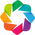

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Hotel Name,City,Country)

In [14]:
# Configure the map plot with the specified CRS and a different tile source 
map_plot = hotel_df.hvplot.points(
    x='Longitude',
    y='Latitude',
    geo=True,
    color='Hotel Name',  # 'Hotel Name' contains the hotel name
    cmap='coolwarm',
    title='Hotels Location',
    frame_width=400,
    frame_height=200,
    hover_cols=['City', 'Country', 'Hotel Name'], 
    tiles='CartoLight' 
).opts(width=400, height=200, tools=['hover'])

# Display the interactive map 
gv.extension('bokeh')
map_plot